Imports

In [153]:
import numpy as np
import matplotlib.pyplot as plt

Data

In [154]:
X_train = np.array([1,2,3,4,5])
y_train = np.array([11,21,31,41,51])

X_test = np.array([10])

Plotting the dataset

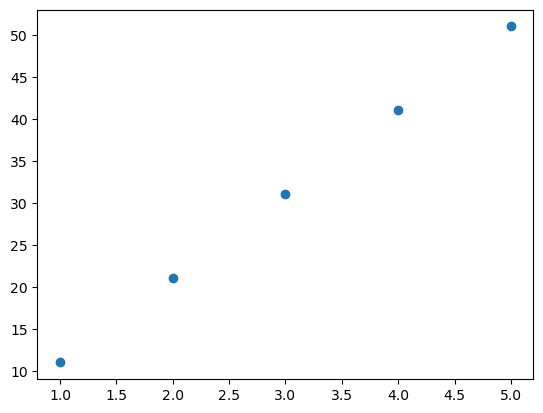

In [155]:
plt.scatter(X_train, y_train)
plt.show()

Compute cost function

###### Cost function gives an overall approximation of how good a ML model is. [Not to be confused with loss function, which also calculates error, but is used in the training phase, for evaluating the state of model during training]

In [156]:
def cost(x, y, w, b):
    m = x.shape[0]
    tot_err = 0
    for i in range(m):
        f_wb_i = w * x[i] + b
        err = (f_wb_i - y[i]) ** 2
        tot_err += err
    tot_cost = (1/2*m) * tot_err
    return tot_cost

Computing the gradient and performing gradient descent

###### In machine learning, gradients are vectors that point in the direction of the steepest increase or decrease in a function. More specifically, they are the partial derivatives of a function with respect to its parameters.

In [157]:
def compute_gradient(x, y, w, b):
    dJ_dw, dJ_db = 0, 0
    m = x.shape[0]
    for i in range(m):
        f_wb_i = w*x[i] + b                 # basic function

        dJ_dw_i = (f_wb_i - y[i])*x[i]     # we got this from differenciation (theory)
        dJ_db_i = (f_wb_i - y[i])

        dJ_dw += dJ_dw_i                    # Simultaneous updation
        dJ_db += dJ_db_i
    
    return dJ_dw/m, dJ_db/m    

###### Gradient descent is an algorithm which will converge on the minima of a given function. Here, 

In [158]:
def gradient_descent(x, y, w, b, lr, num_epoch, gradient_fn, cost_fn):
    cost_list = []  # For plotting in future
    for i in range(num_epoch):
        dJ_dw, dJ_db = gradient_fn(x, y, w, b)
        w -= lr * dJ_dw
        b -= lr * dJ_db
        current_cost = cost_fn(x, y, w, b)
        cost_list.append(current_cost)
    return w, b, cost_list

Implementing everything

In [159]:
lr =.1
num_epochs = 2000
w_i,b_i = 1,2           # Random numbers initiated
w, b, cost_list = gradient_descent(X_train, y_train, w_i, b_i,lr, num_epochs, compute_gradient, cost)

Plotting the cost vs iteration graph

[]

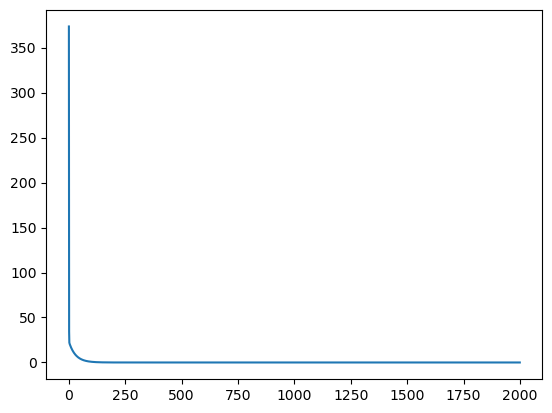

In [160]:
x = [i for i in range(num_epochs)] 
y = cost_list
plt.plot(x,y)
plt.plot()

In [167]:
cost_list[-1]

3.155443620884047e-29

###### Looks from the cost-iteration graph that the gradient descent has converged.

Testing

In [161]:
print(w, b)

9.999999999999998 1.0000000000000053


In [162]:
y_test = w*X_test[0] + b
y_test

100.99999999999999

###### which seems correct. This is gradient descent